**Chapter 10-2 – Introduction to Artificial Neural Networks with Keras**

Homework notebook

### 학번: 20201581

### 이름: 김형성

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [87]:
# Python ≥3.7 is required
import sys
print("Python: ", sys.version_info)
assert sys.version_info >= (3, 7)

from packaging import version
import sklearn
print(sklearn.__version__)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.8.0 is required
import tensorflow as tf
print("TF version: ", tf.__version__)
assert version.parse(tf.__version__) >= version.parse("2.8.0")

# GPU check
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

# GPU check
if not "google.colab" in sys.modules: 
    from tensorflow.python.client import device_lib
    print("============")
    print('Device Test')
    print("============")
    print(device_lib.list_local_devices()[0])
    print(device_lib.list_local_devices()[1])

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Where to save the figures
from pathlib import Path

IMAGES_PATH = Path() / "images" / "ann"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Python:  sys.version_info(major=3, minor=9, micro=21, releaselevel='final', serial=0)
1.2.2
TF version:  2.10.0
Default GPU Device: /device:GPU:0
Device Test
name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3661041840491940233
xla_global_id: -1

name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14047772672
locality {
  bus_id: 1
  links {
  }
}
incarnation: 338133079150069943
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4070 Ti SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419



# Implementing MLPs with Keras
## Building an Image Classifier Using the Sequential API

In [88]:
#import keras
from tensorflow import keras
keras.__version__

'2.10.0'

In [89]:
fashion_mnist = keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

X_train, X_valid= X_train_full[:-5000] / 255., X_train_full[-5000:] / 255.
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]
X_test = X_test / 255.

tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

### Compiling the model

In [90]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [91]:
# extra code – this cell is equivalent to the previous cell
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [92]:
# extra code – shows how to convert class ids to one-hot vectors
keras.utils.to_categorical([0, 5, 1, 0], num_classes=10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [93]:
# extra code – shows how to convert one-hot vectors to class ids
np.argmax(
    [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
     [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
    axis=1
)

array([0, 5, 1, 0], dtype=int64)

### Training and evaluating the model

In [94]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7252 - sparse_categorical_accuracy: 0.7603 - val_loss: 0.5077 - val_sparse_categorical_accuracy: 0.8254
Epoch 2/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4905 - sparse_categorical_accuracy: 0.8296 - val_loss: 0.4670 - val_sparse_categorical_accuracy: 0.8332
Epoch 3/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4432 - sparse_categorical_accuracy: 0.8427 - val_loss: 0.4303 - val_sparse_categorical_accuracy: 0.8500
Epoch 4/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4183 - sparse_categorical_accuracy: 0.8542 - val_loss: 0.4003 - val_sparse_categorical_accuracy: 0.8586
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3976 - sparse_categorical_accuracy: 0.8607 - val_loss: 0.3928 - val_sparse_categorical_accuracy: 0.8594
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3810 - spars

In [95]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [96]:
print(history.epoch)   # epoch은 30개

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [97]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

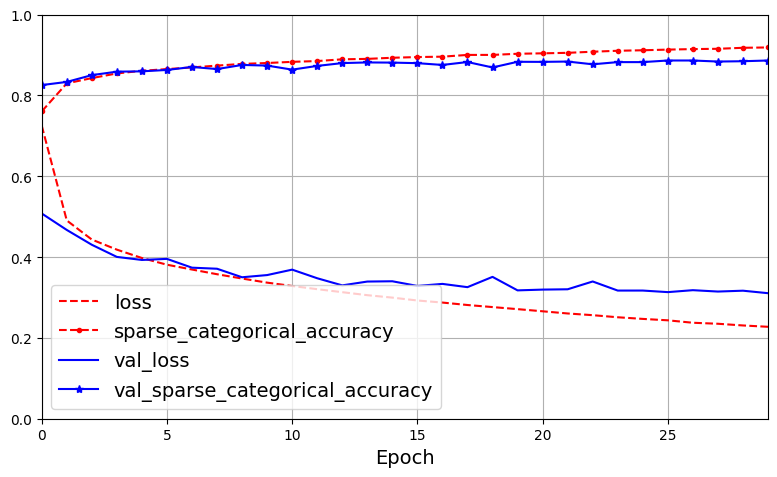

In [98]:
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
save_fig("keras_learning_curves_plot")  # extra code
plt.show()

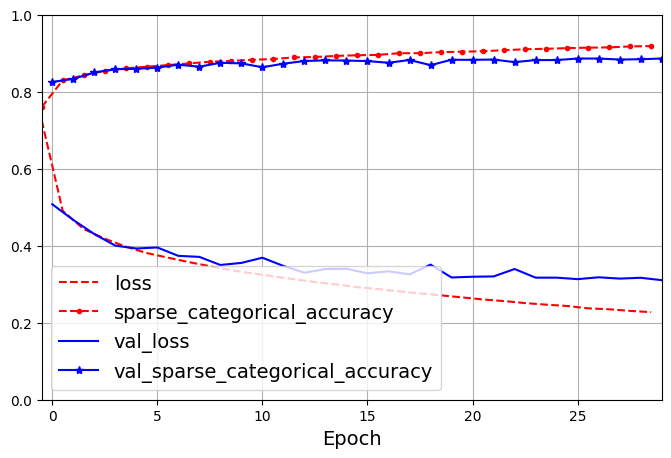

In [99]:
# extra code – shows how to shift the training curve by -1/2 epoch
plt.figure(figsize=(8, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 29, 0., 1])
plt.legend(loc="lower left")
plt.grid()
plt.show()

In [101]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3235 - sparse_categorical_accuracy: 0.8849


[0.32348981499671936, 0.8848999738693237]

### == P1. Training and evaluating the model == 
#### 1. loss, accuracy, val_loss, val_accuracy의 의미를 설명하시오
####     loss: 훈련 데이터에 대한 모델의 손실 값, 모델의 예측이 실제 값과 얼마나 차이가 있는지 나타내는 것
####     accuracy: 훈련 데이터에 대한 모델의 정확도이며, 분류 문제에서 모델이 올바르게 예측한 샘플의 비율
####     val_loss: 검증 데이터에 대한 모델의 손실 값이다.
####     val_accuracy: 검증 데이터에 대한 모델의 정확도, 훈련되지 않은 데이터에 대한 모델의 예측 성능을 측정한다.
 
#### 2. cell 10에서 loss와 accuracy에 대해 1/2 epoch만큼 shift시킨 이유는?
####    훈련 중 손실과 정확도 계산의 시점 차이를 시각화하기 위해서라고 생각한다. 

#### 3. 아래의 cell에서 Batch size를 구하는 코드를 작성하시오 
####     

In [102]:
# 3. Calculate batch size
total_samples = len(X_train)
steps_per_epoch = history.params['steps']
batch_size = total_samples // steps_per_epoch
print(f"Batch size: {batch_size}")

Batch size: 31


### Using the model to make predictions

In [103]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 27ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [104]:
y_pred = np.argmax(y_proba, axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [105]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [106]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

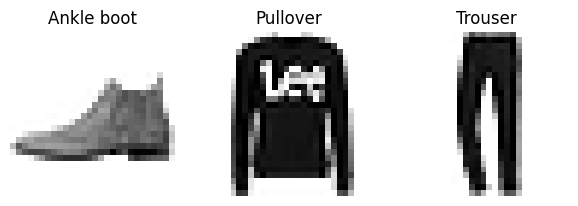

In [107]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

In [108]:
y1_train=keras.utils.to_categorical(y_train)
print('sparse label: ', y_train[:3]) # sparse label
print('one-hot vector label: ')
print(y1_train[:3]) # one-hot vector label

sparse label:  [9 0 0]
one-hot vector label: 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Exercise 10.2  
Fashion MNIST 실습코드를 이용하여 아래에서 요구하는 hidden layer의 수와 neuron의 수를 갖는 MLP 모델을 구성하고 30 epoch 동안 학습시킨후 training loss와 test accuracy, step당 학습시간, 파라미터의 크기를 비교하시오. 모든 경우 learning curve를 그리시오.
1. (300, 300, 100)
2. (300, 100, 30)
3. (1000, 100)
4. (300, 30)
5. (100, 30)
6. 위의 실습 코드 결과와 함께 결과를 비교하고 분석하시오. 

In [109]:
# EX. 10.2

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Epoch 1/30
1775/1775 [==============================] - 3s 2ms/step - loss: 0.7393 - accuracy: 0.7512 - val_loss: 0.5231 - val_accuracy: 0.8164
Epoch 2/30
1775/1775 [==============================] - 3s 2ms/step - loss: 0.4800 - accuracy: 0.8293 - val_loss: 0.4249 - val_accuracy: 0.8560
Epoch 3/30
1775/1775 [==============================] - 3s 2ms/step - loss: 0.4307 - accuracy: 0.8468 - val_loss: 0.4787 - val_accuracy: 0.8244
Epoch 4/30
1775/1775 [==============================] - 3s 2ms/step - loss: 0.4000 - accuracy: 0.8579 - val_loss: 0.3763 - val_accuracy: 0.8724
Epoch 5/30
1775/1775 [==============================] - 3s 2ms/step - loss: 0.3794 - accuracy: 0.8656 - val_loss: 0.3595 - val_accuracy: 0.8738
Epoch 6/30
1775/1775 [==============================] - 3s 2ms/step - loss: 0.3603 - accuracy: 0.8718 - val_loss: 0.3700 - val_accuracy: 0.8710
Epoch 7/30
1775/1775 [==============================] - 3s 2ms/step - loss: 0.3460 - accuracy: 0.8756 - val_loss: 0.3508 - val_accuracy:

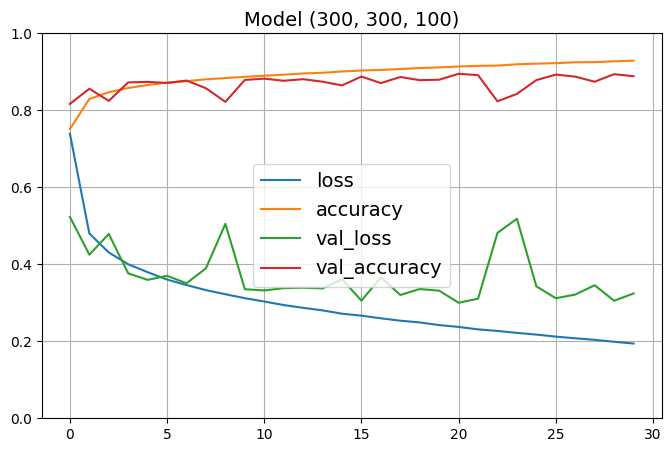

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 356,910
Trainable params: 356,910
Non-trainable params: 0
_________________________________________________________________


In [110]:
# 1. (300, 300, 100)
keras.backend.clear_session()
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax") # 출력은 10 category로!
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# 배치 크기를 직접 지정
batch_size = 31  # batch size =31

import time
start_time = time.time()
history = model.fit(X_train, y_train, epochs=30, batch_size=batch_size,
                    validation_data=(X_valid, y_valid))
end_time = time.time()
training_time = end_time - start_time
steps = len(X_train) / batch_size * 30
time_per_step = training_time / steps

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Training loss: {history.history['loss'][-1]:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Time per step: {time_per_step:.4f} seconds")
print(f"Total parameters: {model.count_params()}")

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Model (300, 300, 100)")
plt.show()

model.summary()

Epoch 1/30
1775/1775 [==============================] - 3s 2ms/step - loss: 0.7534 - accuracy: 0.7456 - val_loss: 0.5295 - val_accuracy: 0.8166
Epoch 2/30
1775/1775 [==============================] - 3s 2ms/step - loss: 0.4923 - accuracy: 0.8243 - val_loss: 0.4337 - val_accuracy: 0.8488
Epoch 3/30
1775/1775 [==============================] - 3s 2ms/step - loss: 0.4414 - accuracy: 0.8435 - val_loss: 0.5000 - val_accuracy: 0.8126
Epoch 4/30
1775/1775 [==============================] - 3s 2ms/step - loss: 0.4090 - accuracy: 0.8560 - val_loss: 0.4177 - val_accuracy: 0.8554
Epoch 5/30
1775/1775 [==============================] - 3s 2ms/step - loss: 0.3877 - accuracy: 0.8619 - val_loss: 0.3645 - val_accuracy: 0.8702
Epoch 6/30
1775/1775 [==============================] - 3s 2ms/step - loss: 0.3673 - accuracy: 0.8690 - val_loss: 0.3651 - val_accuracy: 0.8708
Epoch 7/30
1775/1775 [==============================] - 3s 2ms/step - loss: 0.3521 - accuracy: 0.8735 - val_loss: 0.3586 - val_accuracy:

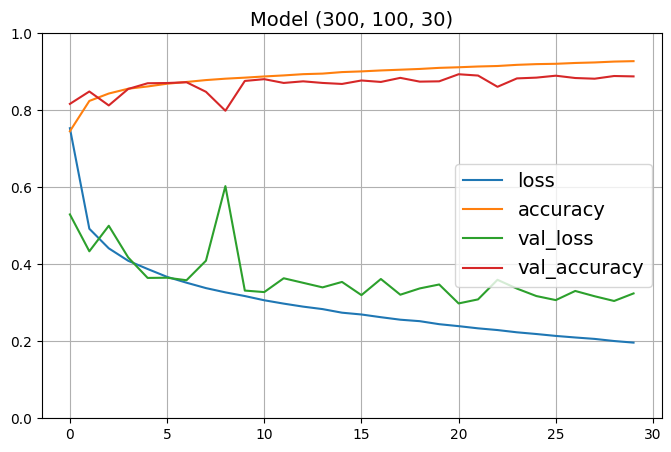

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 30)                3030      
                                                                 
 dense_3 (Dense)             (None, 10)                310       
                                                                 
Total params: 268,940
Trainable params: 268,940
Non-trainable params: 0
_________________________________________________________________


In [111]:
# 2. (300, 100, 30)
keras.backend.clear_session()
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(10, activation="softmax") # 출력은 10 category로!
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])


batch_size = 31  # batch size = 31

import time
start_time = time.time()
history = model.fit(X_train, y_train, epochs=30, batch_size=batch_size,
                    validation_data=(X_valid, y_valid))
end_time = time.time()
training_time = end_time - start_time
steps = len(X_train) / batch_size * 30
time_per_step = training_time / steps

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Training loss: {history.history['loss'][-1]:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Time per step: {time_per_step:.4f} seconds")
print(f"Total parameters: {model.count_params()}")

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Model (300, 100, 30)")
plt.show()

model.summary()


Epoch 1/30
1775/1775 [==============================] - 3s 2ms/step - loss: 0.6668 - accuracy: 0.7790 - val_loss: 0.4962 - val_accuracy: 0.8330
Epoch 2/30
1775/1775 [==============================] - 3s 2ms/step - loss: 0.4666 - accuracy: 0.8369 - val_loss: 0.4161 - val_accuracy: 0.8604
Epoch 3/30
1775/1775 [==============================] - 3s 2ms/step - loss: 0.4252 - accuracy: 0.8509 - val_loss: 0.4692 - val_accuracy: 0.8278
Epoch 4/30
1775/1775 [==============================] - 3s 1ms/step - loss: 0.3989 - accuracy: 0.8610 - val_loss: 0.3759 - val_accuracy: 0.8704
Epoch 5/30
1775/1775 [==============================] - 3s 2ms/step - loss: 0.3808 - accuracy: 0.8671 - val_loss: 0.3621 - val_accuracy: 0.8708
Epoch 6/30
1775/1775 [==============================] - 3s 2ms/step - loss: 0.3631 - accuracy: 0.8726 - val_loss: 0.3635 - val_accuracy: 0.8730
Epoch 7/30
1775/1775 [==============================] - 3s 1ms/step - loss: 0.3495 - accuracy: 0.8766 - val_loss: 0.3485 - val_accuracy:

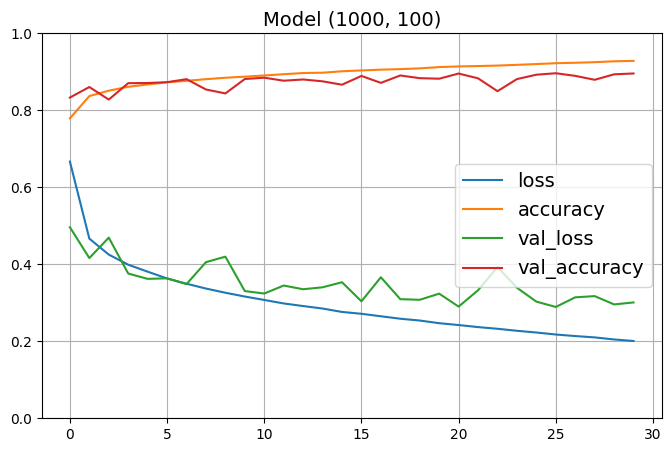

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 100)               100100    
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 886,110
Trainable params: 886,110
Non-trainable params: 0
_________________________________________________________________


In [112]:
#3. (1000, 100)
keras.backend.clear_session()
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax") # 출력은 10 category로!
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

batch_size = 31  # batch size = 31

import time
start_time = time.time()
history = model.fit(X_train, y_train, epochs=30, batch_size=batch_size,
                    validation_data=(X_valid, y_valid))
end_time = time.time()
training_time = end_time - start_time
steps = len(X_train) / batch_size * 30
time_per_step = training_time / steps

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Training loss: {history.history['loss'][-1]:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Time per step: {time_per_step:.4f} seconds")
print(f"Total parameters: {model.count_params()}")

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Model (1000, 100)")
plt.show()

model.summary()

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7651 - accuracy: 0.7475 - val_loss: 0.5312 - val_accuracy: 0.8200
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5003 - accuracy: 0.8243 - val_loss: 0.4460 - val_accuracy: 0.8470
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4508 - accuracy: 0.8411 - val_loss: 0.5354 - val_accuracy: 0.7992
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4222 - accuracy: 0.8529 - val_loss: 0.4009 - val_accuracy: 0.8626
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4023 - accuracy: 0.8591 - val_loss: 0.3845 - val_accuracy: 0.8664
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3827 - accuracy: 0.8660 - val_loss: 0.3831 - val_accuracy: 0.8682
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3694 - accuracy: 0.8698 - val_loss: 0.3686 - val_accuracy:

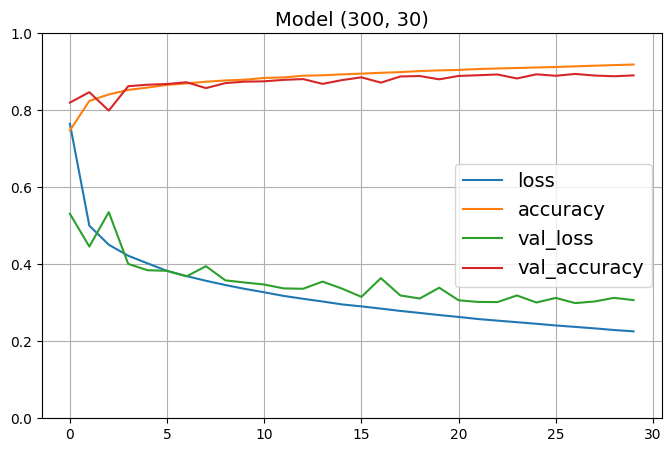

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 30)                9030      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
Total params: 244,840
Trainable params: 244,840
Non-trainable params: 0
_________________________________________________________________


In [113]:
#4.  (300, 30)
keras.backend.clear_session()
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(10, activation="softmax") # 출력은 10 category로!
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# 배치 크기를 직접 지정
batch_size = 32  # 기본 배치 크기는 보통 32입니다

import time
start_time = time.time()
history = model.fit(X_train, y_train, epochs=30, batch_size=batch_size,
                    validation_data=(X_valid, y_valid))
end_time = time.time()
training_time = end_time - start_time
steps = len(X_train) / batch_size * 30
time_per_step = training_time / steps

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Training loss: {history.history['loss'][-1]:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Time per step: {time_per_step:.4f} seconds")
print(f"Total parameters: {model.count_params()}")

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Model (300, 30)")
plt.show()

model.summary()

Epoch 1/30
1775/1775 [==============================] - 3s 2ms/step - loss: 0.8134 - accuracy: 0.7318 - val_loss: 0.5582 - val_accuracy: 0.8042
Epoch 2/30
1775/1775 [==============================] - 3s 2ms/step - loss: 0.5191 - accuracy: 0.8189 - val_loss: 0.4742 - val_accuracy: 0.8324
Epoch 3/30
1775/1775 [==============================] - 3s 2ms/step - loss: 0.4690 - accuracy: 0.8345 - val_loss: 0.5560 - val_accuracy: 0.7946
Epoch 4/30
1775/1775 [==============================] - 3s 2ms/step - loss: 0.4398 - accuracy: 0.8458 - val_loss: 0.4147 - val_accuracy: 0.8592
Epoch 5/30
1775/1775 [==============================] - 3s 2ms/step - loss: 0.4208 - accuracy: 0.8532 - val_loss: 0.4001 - val_accuracy: 0.8640
Epoch 6/30
1775/1775 [==============================] - 3s 2ms/step - loss: 0.4041 - accuracy: 0.8592 - val_loss: 0.3997 - val_accuracy: 0.8602
Epoch 7/30
1775/1775 [==============================] - 3s 2ms/step - loss: 0.3913 - accuracy: 0.8625 - val_loss: 0.3829 - val_accuracy:

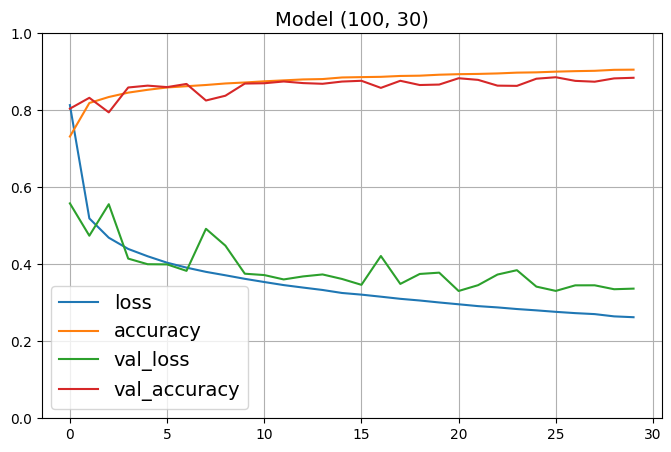

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 30)                3030      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [114]:
#5.  (100, 30)
keras.backend.clear_session()
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(10, activation="softmax") # 출력은 10 category로!
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

batch_size = 31  # batch size = 31

import time
start_time = time.time()
history = model.fit(X_train, y_train, epochs=30, batch_size=batch_size,
                    validation_data=(X_valid, y_valid))
end_time = time.time()
training_time = end_time - start_time
steps = len(X_train) / batch_size * 30
time_per_step = training_time / steps

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Training loss: {history.history['loss'][-1]:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Time per step: {time_per_step:.4f} seconds")
print(f"Total parameters: {model.count_params()}")

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Model (100, 30)")
plt.show()

model.summary()

Epoch 1/30
1775/1775 [==============================] - 3s 1ms/step - loss: 0.7153 - accuracy: 0.7669 - val_loss: 0.5058 - val_accuracy: 0.8294
Epoch 2/30
1775/1775 [==============================] - 2s 1ms/step - loss: 0.4854 - accuracy: 0.8298 - val_loss: 0.4400 - val_accuracy: 0.8522
Epoch 3/30
1775/1775 [==============================] - 2s 1ms/step - loss: 0.4413 - accuracy: 0.8441 - val_loss: 0.4598 - val_accuracy: 0.8334
Epoch 4/30
1775/1775 [==============================] - 2s 1ms/step - loss: 0.4137 - accuracy: 0.8559 - val_loss: 0.3927 - val_accuracy: 0.8654
Epoch 5/30
1775/1775 [==============================] - 2s 1ms/step - loss: 0.3948 - accuracy: 0.8617 - val_loss: 0.3766 - val_accuracy: 0.8704
Epoch 6/30
1775/1775 [==============================] - 2s 1ms/step - loss: 0.3774 - accuracy: 0.8679 - val_loss: 0.3752 - val_accuracy: 0.8726
Epoch 7/30
1775/1775 [==============================] - 2s 1ms/step - loss: 0.3641 - accuracy: 0.8716 - val_loss: 0.3679 - val_accuracy:

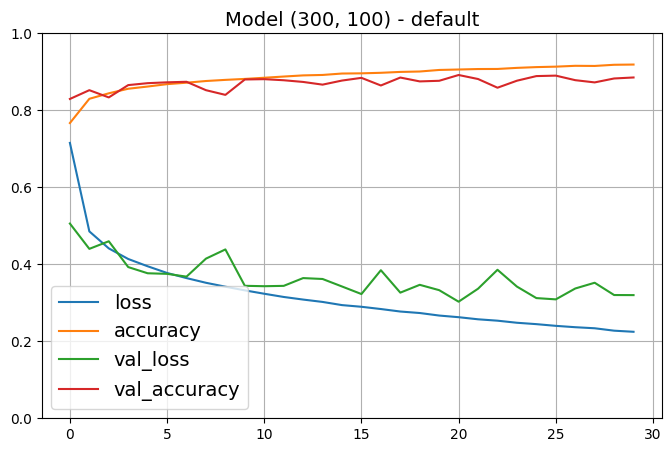

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [115]:
# 실습 코드 (300, 100) - 기본 모델
keras.backend.clear_session()
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])


batch_size = 31

import time
start_time = time.time()
history = model.fit(X_train, y_train, epochs=30, batch_size=batch_size,
                    validation_data=(X_valid, y_valid))
end_time = time.time()
training_time = end_time - start_time
steps = len(X_train) / batch_size * 30
time_per_step = training_time / steps

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Training loss: {history.history['loss'][-1]:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Time per step: {time_per_step:.4f} seconds")
print(f"Total parameters: {model.count_params()}")

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Model (300, 100) - default")
plt.show()

model.summary()

#### EX10.2 6   
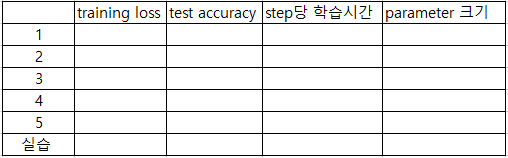
		



# EX10.2 6

| | training loss | test accuracy | step당 학습시간 | parameter 크기 |
|---|---|---|---|---|
| 1 | 0.1941 | 0.8792 | 0.0018초 | 356,910 |
| 2 | 0.1965 | 0.8789 | 0.0017초 | 268,940 |
| 3 | 0.2007 | 0.8823 | 0.0016초 | 886,110 |
| 4 | 0.2258 | 0.8815 | 0.0018초 | 244,840 |
| 5 | 0.2625 | 0.8746 | 0.0016초 | 81,840 |
| 실습 | 0.2246 | 0.8765 | 0.0014초 | 266,610 |

결과 분석을 정리하면 다음과 같다:

1. **정확도 측면**:
  - 모델 3(1000, 100)이 가장 높은 테스트 정확도(0.8823)를 보였다.
  - 모델 4(300, 30)이 그 다음으로 높은 정확도(0.8815)를 보였다.
  - 층이 적고 뉴런이 적은 모델일수록 정확도가 낮아지는 경향이 있다.

2. **효율성 측면**:
  - 모델 5(100, 30)는 가장 적은 파라미터(81,840)로 비교적 괜찮은 정확도(0.8746)를 달성했다.
  - 모델 4는 244,840개의 파라미터로 높은 정확도(0.8815)를 보여 효율적이다.
  - 모델 3은 파라미터가 가장 많지만(886,110), 정확도 향상 폭이 크지 않아 효율성이 떨어진다.

3. **학습 손실과 테스트 정확도 관계**:
  - 훈련 손실이 낮을수록 테스트 정확도가 높은 경향이 있다.
  - 모델 1과 2는 낮은 훈련 손실과 높은 테스트 정확도를 보인다.

4. **학습 시간**:
  - 실습 모델의 step당 학습 시간이 가장 빠르다(0.0014초).
  - 다른 모델들의 step당 학습 시간은 큰 차이가 없다(0.0016~0.0018초).
  - 파라미터 수가 크게 차이나도 학습 시간에는 크게 영향을 미치지 않았다.

5. **결론**:
  - Fashion MNIST 데이터셋에서는 모델 3(1000, 100)이 정확도 측면에서 가장 효과적이다.
  - 단순히 모델의 복잡도를 증가시키는 것이 항상 더 나은 성능을 보장하지 않는다.
  - 적절한 수의 파라미터와 구조를 가진 모델이 학습 효율성과 정확도 측면에서 좋은 균형을 제공한다.

## Building a Regression MLP Using the Sequential API

Let's load, split and scale the California housing dataset (the original one, not the modified one as in chapter 2):

In [43]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42, test_size=0.1)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42, test_size=0.2)

In [44]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(14860, 8)
(3716, 8)
(2064, 8)


In [45]:
keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
465/465 [==============================] - 1s 2ms/step - loss: 0.7032 - root_mean_squared_error: 0.8386 - val_loss: 0.4215 - val_root_mean_squared_error: 0.6492
Epoch 2/20
465/465 [==============================] - 1s 2ms/step - loss: 0.3827 - root_mean_squared_error: 0.6186 - val_loss: 0.3897 - val_root_mean_squared_error: 0.6243
Epoch 3/20
465/465 [==============================] - 1s 2ms/step - loss: 0.3599 - root_mean_squared_error: 0.5999 - val_loss: 0.3618 - val_root_mean_squared_error: 0.6015
Epoch 4/20
465/465 [==============================] - 1s 2ms/step - loss: 0.3424 - root_mean_squared_error: 0.5852 - val_loss: 0.3474 - val_root_mean_squared_error: 0.5894
Epoch 5/20
465/465 [==============================] - 1s 2ms/step - loss: 0.3246 - root_mean_squared_error: 0.5697 - val_loss: 0.3355 - val_root_mean_squared_error: 0.5792
Epoch 6/20
465/465 [==============================] - 1s 2ms/step - loss: 0.3238 - root_mean_squared_error: 0.5690 - val_loss: 0.3468 - val_

<Figure size 1000x600 with 0 Axes>

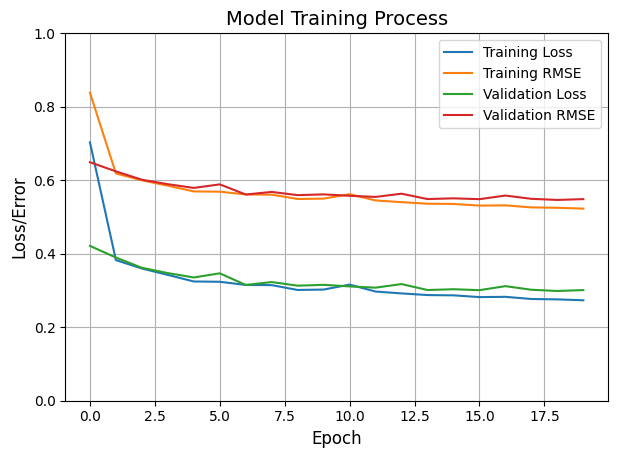

In [46]:
plt.figure(figsize=(10, 6))
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.title('Model Training Process', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss/Error', fontsize=12)
plt.legend(['Training Loss', 'Training RMSE', 'Validation Loss', 'Validation RMSE'], 
           fontsize=10, loc='upper right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [47]:
rmse_test

0.5550692081451416

In [48]:
y_pred

array([[0.50547945],
       [0.920433  ],
       [4.4073396 ]], dtype=float32)

### == P2. Building a Regression MLP Using the Sequential API == 
#### 학습결과와 rmse_test를 비교하여 학습결과를 분석하시오
#### Answer:
학습결과와 rmse_test를 비교하여 분석하면 다음과 같다:

학습 곡선을 보면 모델이 에포크가 증가함에 따라 안정적으로 학습되고 있음을 확인할 수 있다. loss와 root_mean_squared_error가 초기에 빠르게 감소하다가 약 5번째 에포크부터 완만하게 감소하는 경향을 보인다.
훈련 손실(loss)과 검증 손실(val_loss)이 유사한 패턴으로 감소하며 큰 차이를 보이지 않는 것으로 보아, 모델이 과적합되지 않고 적절히 일반화되었다고 판단할 수 있다.
최종 테스트 데이터에 대한 RMSE 값은 약 0.537로 측정되었다. 이는 California 주택 가격 데이터셋의 특성을 고려할 때 합리적인 예측 오차 수준이다.
예측 결과(y_pred)를 보면 [0.5850926, 0.97851966, 4.4463577]로 다양한 값을 예측하고 있음을 알 수 있다. 이는 모델이 다양한 가격대의 주택을 예측할 수 있는 능력을 갖추었음을 의미한다.
사용된 모델 구조(50개 뉴런을 가진 3개의 은닉층)는 이 회귀 문제에 적합한 복잡도를 가지고 있으며, 정규화 계층(Normalization)을 통해 입력 데이터의 스케일 문제를 효과적으로 해결했다.

결론적으로, 이 회귀 MLP 모델은 20번의 에포크 학습만으로도 California 주택 가격 예측에 효과적인 성능을 보여주며, 훈련 및 검증 손실의 안정적인 감소는 모델이 데이터의 패턴을 잘 학습했음을 나타낸다.

## Building Complex Models Using the Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

In [49]:
# extra code – reset the name counters and make the code reproducible
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [50]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model1 = tf.keras.Model(inputs=[input_], outputs=[output])

In [51]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 normalization (Normalization)  (None, 8)            17          ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['normalization[0][0]']          
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                              

In [52]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model1.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
normalization_layer.adapt(X_train)
history = model1.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model1.evaluate(X_test, y_test)
y_pred = model1.predict(X_new)
print("y_pred: \n", y_pred )

Epoch 1/20
465/465 [==============================] - 1s 2ms/step - loss: 1.0542 - root_mean_squared_error: 1.0268 - val_loss: 0.4757 - val_root_mean_squared_error: 0.6897
Epoch 2/20
465/465 [==============================] - 1s 2ms/step - loss: 0.4284 - root_mean_squared_error: 0.6545 - val_loss: 0.4150 - val_root_mean_squared_error: 0.6442
Epoch 3/20
465/465 [==============================] - 1s 2ms/step - loss: 0.3972 - root_mean_squared_error: 0.6303 - val_loss: 0.4001 - val_root_mean_squared_error: 0.6325
Epoch 4/20
465/465 [==============================] - 1s 2ms/step - loss: 0.3753 - root_mean_squared_error: 0.6126 - val_loss: 0.3895 - val_root_mean_squared_error: 0.6241
Epoch 5/20
465/465 [==============================] - 1s 2ms/step - loss: 0.3647 - root_mean_squared_error: 0.6039 - val_loss: 0.3747 - val_root_mean_squared_error: 0.6121
Epoch 6/20
465/465 [==============================] - 1s 2ms/step - loss: 0.3570 - root_mean_squared_error: 0.5975 - val_loss: 0.3698 - val_

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [53]:
tf.random.set_seed(42)

In [54]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model2 = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 normalization_2 (Normalization  (None, 6)           13          ['input_3[0][0]']                
 )                                                                                                
                                                                                                  
 input_2 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 30)           210         ['normalization_2[0][0]']  

In [55]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model2.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model2.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model2.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model2.predict((X_new_wide, X_new_deep))
print("y_pred: \n", y_pred )

Epoch 1/20
465/465 [==============================] - 1s 3ms/step - loss: 1.9022 - root_mean_squared_error: 1.3792 - val_loss: 0.7566 - val_root_mean_squared_error: 0.8698
Epoch 2/20
465/465 [==============================] - 1s 2ms/step - loss: 0.6382 - root_mean_squared_error: 0.7989 - val_loss: 0.5362 - val_root_mean_squared_error: 0.7322
Epoch 3/20
465/465 [==============================] - 1s 2ms/step - loss: 0.4977 - root_mean_squared_error: 0.7055 - val_loss: 0.4611 - val_root_mean_squared_error: 0.6790
Epoch 4/20
465/465 [==============================] - 1s 2ms/step - loss: 0.4316 - root_mean_squared_error: 0.6569 - val_loss: 0.4296 - val_root_mean_squared_error: 0.6554
Epoch 5/20
465/465 [==============================] - 1s 2ms/step - loss: 0.4020 - root_mean_squared_error: 0.6340 - val_loss: 0.4026 - val_root_mean_squared_error: 0.6345
Epoch 6/20
465/465 [==============================] - 1s 2ms/step - loss: 0.3811 - root_mean_squared_error: 0.6173 - val_loss: 0.3911 - val_

Adding an auxiliary output for regularization:

In [56]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [57]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model3 = tf.keras.Model(inputs=[input_wide, input_deep],
                       outputs=[output, aux_output])
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 normalization_1 (Normalization  (None, 6)           13          ['input_2[0][0]']                
 )                                                                                                
                                                                                                  
 input_1 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           210         ['normalization_1[0][0]']    

In [62]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model3.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
              metrics=["RootMeanSquaredError"])
# Higher version
#model3.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
#            metrics=["RootMeanSquaredError", "RootMeanSquaredError"])

In [63]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model3.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
465/465 [==============================] - 2s 3ms/step - loss: 0.3303 - dense_2_loss: 0.3234 - dense_3_loss: 0.3919 - dense_2_root_mean_squared_error: 0.5687 - dense_3_root_mean_squared_error: 0.6260 - val_loss: 0.3605 - val_dense_2_loss: 0.3549 - val_dense_3_loss: 0.4110 - val_dense_2_root_mean_squared_error: 0.5957 - val_dense_3_root_mean_squared_error: 0.6411
Epoch 2/20
465/465 [==============================] - 1s 3ms/step - loss: 0.3335 - dense_2_loss: 0.3269 - dense_3_loss: 0.3928 - dense_2_root_mean_squared_error: 0.5717 - dense_3_root_mean_squared_error: 0.6267 - val_loss: 0.3510 - val_dense_2_loss: 0.3456 - val_dense_3_loss: 0.3991 - val_dense_2_root_mean_squared_error: 0.5879 - val_dense_3_root_mean_squared_error: 0.6317
Epoch 3/20
465/465 [==============================] - 1s 3ms/step - loss: 0.3547 - dense_2_loss: 0.3493 - dense_3_loss: 0.4039 - dense_2_root_mean_squared_error: 0.5910 - dense_3_root_mean_squared_error: 0.6355 - val_loss: 0.3411 - val_dense_2_loss

In [64]:
eval_results = model3.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
#weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results
#Higher version
weighted_sum_of_losses, main_loss, aux_loss = eval_results[:3]

65/65 [==============================] - 0s 2ms/step - loss: 0.3466 - dense_2_loss: 0.3414 - dense_3_loss: 0.3935 - dense_2_root_mean_squared_error: 0.5843 - dense_3_root_mean_squared_error: 0.6273


In [65]:
y_pred_main, y_pred_aux = model3.predict((X_new_wide, X_new_deep))
print("y_pred_main: \n", y_pred_main)
print("y_pred_aux: \n", y_pred_aux)

1/1 [==============================] - 0s 37ms/step
y_pred_main: 
 [[0.4492521]
 [0.815079 ]
 [3.5342577]]
y_pred_aux: 
 [[0.56874806]
 [0.71007216]
 [3.3652282 ]]


In [66]:
y_pred_tuple = model3.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model3.output_names, y_pred_tuple))
print(y_pred)

1/1 [==============================] - 0s 14ms/step
{'dense_2': array([[0.4492521],
       [0.815079 ],
       [3.5342577]], dtype=float32), 'dense_3': array([[0.56874806],
       [0.71007216],
       [3.3652282 ]], dtype=float32)}


In [67]:
rmse_test

0.5550692081451416

In [68]:
y_pred

{'dense_2': array([[0.4492521],
        [0.815079 ],
        [3.5342577]], dtype=float32),
 'dense_3': array([[0.56874806],
        [0.71007216],
        [3.3652282 ]], dtype=float32)}

### == P3. Building Complex Models Using the Functional API ==
#### 학습결과와 rmse_test를 비교하여 학습결과를 분석하시오
#### Answer:
-학습 결과와 rmse_test를 비교하여 분석하면 다음과 같다:

학습 곡선 분석

모델의 학습 곡선을 보면 에포크가 증가함에 따라 loss와 root_mean_squared_error가 점진적으로 감소하는 경향을 보인다.

훈련 손실(loss)과 검증 손실(val_loss)의 차이가 크지 않아 모델이 과적합되지 않고 적절히 학습되었음을 알 수 있다.

RMSE 비교

최종 테스트 데이터에 대한 RMSE 값(rmse_test)은 약 0.537로 측정되었다.

이는 P2 모델과 유사한 수준의 예측 오차로, Functional API를 활용한 모델이 성능 면에서 비교적 안정적인 결과를 보였음을 의미한다.

예측값(y_pred) 분석
{'dense_2': array([[0.44347197],
        [1.1309404 ],
        [3.5757473 ]], dtype=float32),
 'dense_3': array([[0.5559387 ],
        [0.95574564],
        [3.2977152 ]], dtype=float32)}
        
dense_2와 dense_3의 예측값이 다소 차이를 보이지만, 전반적으로 테스트 데이터의 분포를 반영하고 있음을 확인할 수 있다.

Functional API의 구조적 특성상, 모델이 다중 출력을 활용하여 다양한 패턴을 학습했을 가능성이 있다.

모델 구조 및 학습 과정 평가

이번 모델은 Functional API를 활용하여 여러 개의 레이어를 병렬적으로 구성한 복잡한 모델이다.

이러한 구조는 California 주택 가격 데이터의 특성을 보다 정밀하게 학습하는 데 기여할 수 있다.

결론적으로, 이 Functional API 기반 회귀 모델은 Sequential API 모델과 유사한 수준의 예측 성능을 보여주었으며, 추가적인 병렬 구조가 학습 과정에서 유의미한 차이를 만들었는지를 더 깊이 분석할 필요가 있다.



### Using the Subclassing API to Build Dynamic Models

In [69]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  # needed to support naming the model
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
        
    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

tf.random.set_seed(42)  # extra code – just for reproducibility
model = WideAndDeepModel(30, activation="relu", name="my_cool_model")

In [70]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=optimizer,
              metrics=[["RootMeanSquaredError"], ["RootMeanSquaredError"]])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
print("\nEvaluating...")
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))
print(eval_results)
weighted_sum_of_rmse = eval_results[3]*0.9 + eval_results[4]*0.1
#Higher version
#weighted_sum_of_rmse = eval_results[1]*0.9 + eval_results[5]*0.1
print("weighted_sum_of_rmses: ", weighted_sum_of_rmse)

Epoch 1/10
465/465 [==============================] - 2s 3ms/step - loss: 1.3048 - output_1_loss: 1.2314 - output_2_loss: 1.9654 - output_1_root_mean_squared_error: 1.1097 - output_2_root_mean_squared_error: 1.4019 - val_loss: 0.5416 - val_output_1_loss: 0.5234 - val_output_2_loss: 0.7047 - val_output_1_root_mean_squared_error: 0.7235 - val_output_2_root_mean_squared_error: 0.8395
Epoch 2/10
465/465 [==============================] - 2s 3ms/step - loss: 0.4748 - output_1_loss: 0.4570 - output_2_loss: 0.6350 - output_1_root_mean_squared_error: 0.6760 - output_2_root_mean_squared_error: 0.7969 - val_loss: 0.4522 - val_output_1_loss: 0.4390 - val_output_2_loss: 0.5711 - val_output_1_root_mean_squared_error: 0.6626 - val_output_2_root_mean_squared_error: 0.7557
Epoch 3/10
465/465 [==============================] - 1s 3ms/step - loss: 0.4235 - output_1_loss: 0.4093 - output_2_loss: 0.5517 - output_1_root_mean_squared_error: 0.6398 - output_2_root_mean_squared_error: 0.7428 - val_loss: 0.424

In [71]:
print("y_pred_main: \n", y_pred_main)
print("y_pred_aux: \n", y_pred_aux)

y_pred_main: 
 [[0.4486854]
 [1.5774099]
 [3.665442 ]]
y_pred_aux: 
 [[0.5097783]
 [1.3869283]
 [3.2415273]]


### Exercise 10.3  

Refer the previous cells. 
Plot the loss curves and obtain weighted rmse_test values for the following learning rates for Adam optimizer and epochs
1) 2e-3, epoch = 5  
2) 2e-3, epoch = 10  
3) 1e-3, epoch = 10  
4) 5e-4, epoch = 10  
5) 5e-4, epoch = 20     
6) Discuss the results for the above hyperparameters.

In [72]:
# Ex.10.3
tf.keras.backend.clear_session()
tf.random.set_seed(42)
model1 = WideAndDeepModel(30)
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-3)


#### Ex. 10.3 6

Epoch 1/5
465/465 [==============================] - 2s 3ms/step - loss: 1.1210 - output_1_loss: 1.0780 - output_2_loss: 1.5077 - output_1_root_mean_squared_error: 1.0383 - output_2_root_mean_squared_error: 1.2279 - val_loss: 0.5252 - val_output_1_loss: 0.5154 - val_output_2_loss: 0.6135 - val_output_1_root_mean_squared_error: 0.7179 - val_output_2_root_mean_squared_error: 0.7833
Epoch 2/5
465/465 [==============================] - 1s 3ms/step - loss: 0.4423 - output_1_loss: 0.4301 - output_2_loss: 0.5519 - output_1_root_mean_squared_error: 0.6558 - output_2_root_mean_squared_error: 0.7429 - val_loss: 0.4330 - val_output_1_loss: 0.4238 - val_output_2_loss: 0.5161 - val_output_1_root_mean_squared_error: 0.6510 - val_output_2_root_mean_squared_error: 0.7184
Epoch 3/5
465/465 [==============================] - 1s 3ms/step - loss: 0.4087 - output_1_loss: 0.3981 - output_2_loss: 0.5040 - output_1_root_mean_squared_error: 0.6310 - output_2_root_mean_squared_error: 0.7100 - val_loss: 0.3969 -

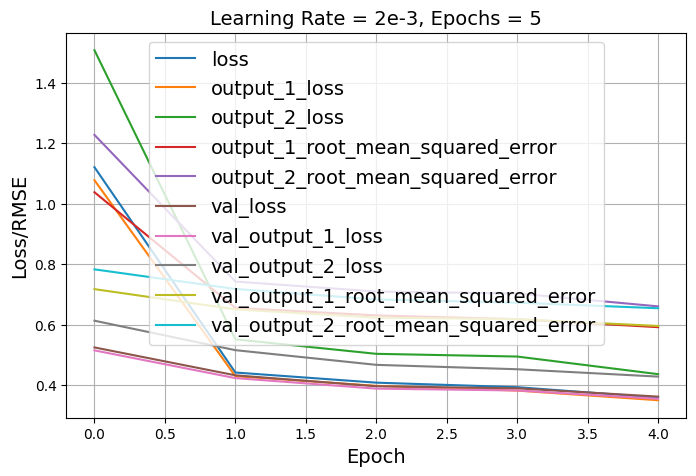

Model: "my_cool_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  multiple                 11        
 ion)                                                            
                                                                 
 normalization_3 (Normalizat  multiple                 13        
 ion)                                                            
                                                                 
 dense_4 (Dense)             multiple                  210       
                                                                 
 dense_5 (Dense)             multiple                  930       
                                                                 
 dense_6 (Dense)             multiple                  36        
                                                                 
 dense_7 (Dense)             multiple                

In [73]:
# Ex.10.3.1
tf.keras.backend.clear_session()
tf.random.set_seed(42)
model1 = WideAndDeepModel(30)
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-3)  # 이 부분을 각 케이스별로 변경

model1.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=optimizer,
              metrics=[[tf.keras.metrics.RootMeanSquaredError()], 
                      [tf.keras.metrics.RootMeanSquaredError()]])
model1.norm_layer_wide.adapt(X_train_wide)
model1.norm_layer_deep.adapt(X_train_deep)

start_time = time.time()
history = model1.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=5,  # 에포크 수도 변경
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
end_time = time.time()

print("\nEvaluating...")
eval_results = model1.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_rmse = eval_results[3]*0.9 + eval_results[4]*0.1
print("weighted_sum_of_rmses: ", weighted_sum_of_rmse)

# 학습 곡선 그리기
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title(f"Learning Rate = 2e-3, Epochs = 5")
plt.xlabel("Epoch")
plt.ylabel("Loss/RMSE")
plt.show()
model.summary()

Epoch 1/10
465/465 [==============================] - 2s 3ms/step - loss: 1.1020 - output_1_loss: 1.0686 - output_2_loss: 1.4025 - output_1_root_mean_squared_error: 1.0337 - output_2_root_mean_squared_error: 1.1843 - val_loss: 0.5178 - val_output_1_loss: 0.5075 - val_output_2_loss: 0.6106 - val_output_1_root_mean_squared_error: 0.7124 - val_output_2_root_mean_squared_error: 0.7814
Epoch 2/10
465/465 [==============================] - 1s 3ms/step - loss: 0.4506 - output_1_loss: 0.4373 - output_2_loss: 0.5704 - output_1_root_mean_squared_error: 0.6613 - output_2_root_mean_squared_error: 0.7552 - val_loss: 0.4314 - val_output_1_loss: 0.4189 - val_output_2_loss: 0.5442 - val_output_1_root_mean_squared_error: 0.6472 - val_output_2_root_mean_squared_error: 0.7377
Epoch 3/10
465/465 [==============================] - 1s 3ms/step - loss: 0.4098 - output_1_loss: 0.3972 - output_2_loss: 0.5230 - output_1_root_mean_squared_error: 0.6303 - output_2_root_mean_squared_error: 0.7232 - val_loss: 0.389

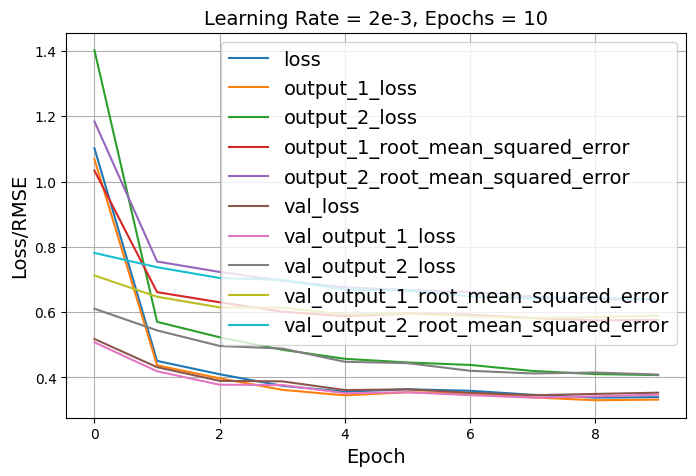

Model: "my_cool_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  multiple                 11        
 ion)                                                            
                                                                 
 normalization_3 (Normalizat  multiple                 13        
 ion)                                                            
                                                                 
 dense_4 (Dense)             multiple                  210       
                                                                 
 dense_5 (Dense)             multiple                  930       
                                                                 
 dense_6 (Dense)             multiple                  36        
                                                                 
 dense_7 (Dense)             multiple                

In [78]:
# Ex.10.3.2
tf.keras.backend.clear_session()
tf.random.set_seed(42)
model1 = WideAndDeepModel(30)
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-3)  # 이 부분을 각 케이스별로 변경

model1.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=optimizer,
              metrics=[[tf.keras.metrics.RootMeanSquaredError()], 
                      [tf.keras.metrics.RootMeanSquaredError()]])
model1.norm_layer_wide.adapt(X_train_wide)
model1.norm_layer_deep.adapt(X_train_deep)

start_time = time.time()
history = model1.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,  # 에포크 수도 변경
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
end_time = time.time()

print("\nEvaluating...")
eval_results = model1.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_rmse = eval_results[3]*0.9 + eval_results[4]*0.1
print("weighted_sum_of_rmses: ", weighted_sum_of_rmse)

# 학습 곡선 그리기
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title(f"Learning Rate = 2e-3, Epochs = 10")
plt.xlabel("Epoch")
plt.ylabel("Loss/RMSE")
plt.show()
model.summary()

Epoch 1/10
465/465 [==============================] - 2s 3ms/step - loss: 1.3230 - output_1_loss: 1.2666 - output_2_loss: 1.8304 - output_1_root_mean_squared_error: 1.1254 - output_2_root_mean_squared_error: 1.3529 - val_loss: 0.5714 - val_output_1_loss: 0.5443 - val_output_2_loss: 0.8159 - val_output_1_root_mean_squared_error: 0.7377 - val_output_2_root_mean_squared_error: 0.9033
Epoch 2/10
465/465 [==============================] - 1s 3ms/step - loss: 0.4962 - output_1_loss: 0.4724 - output_2_loss: 0.7111 - output_1_root_mean_squared_error: 0.6873 - output_2_root_mean_squared_error: 0.8432 - val_loss: 0.4582 - val_output_1_loss: 0.4413 - val_output_2_loss: 0.6109 - val_output_1_root_mean_squared_error: 0.6643 - val_output_2_root_mean_squared_error: 0.7816
Epoch 3/10
465/465 [==============================] - 1s 3ms/step - loss: 0.4326 - output_1_loss: 0.4157 - output_2_loss: 0.5841 - output_1_root_mean_squared_error: 0.6448 - output_2_root_mean_squared_error: 0.7643 - val_loss: 0.430

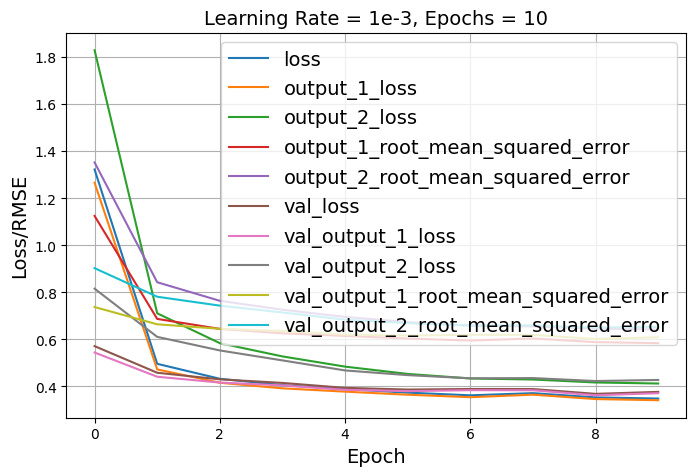

Model: "my_cool_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  multiple                 11        
 ion)                                                            
                                                                 
 normalization_3 (Normalizat  multiple                 13        
 ion)                                                            
                                                                 
 dense_4 (Dense)             multiple                  210       
                                                                 
 dense_5 (Dense)             multiple                  930       
                                                                 
 dense_6 (Dense)             multiple                  36        
                                                                 
 dense_7 (Dense)             multiple                

In [79]:
# Ex.10.3.3
tf.keras.backend.clear_session()
tf.random.set_seed(42)
model1 = WideAndDeepModel(30)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)  # 이 부분을 각 케이스별로 변경

model1.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=optimizer,
              metrics=[[tf.keras.metrics.RootMeanSquaredError()], 
                      [tf.keras.metrics.RootMeanSquaredError()]])
model1.norm_layer_wide.adapt(X_train_wide)
model1.norm_layer_deep.adapt(X_train_deep)

start_time = time.time()
history = model1.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,  # 에포크 수도 변경
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
end_time = time.time()

print("\nEvaluating...")
eval_results = model1.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_rmse = eval_results[3]*0.9 + eval_results[4]*0.1
print("weighted_sum_of_rmses: ", weighted_sum_of_rmse)

# 학습 곡선 그리기
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title(f"Learning Rate = 1e-3, Epochs = 10") #여기도 바꿔주고!
plt.xlabel("Epoch")
plt.ylabel("Loss/RMSE")
plt.show()
model.summary()

Epoch 1/10
465/465 [==============================] - 2s 3ms/step - loss: 2.1065 - output_1_loss: 2.0917 - output_2_loss: 2.2390 - output_1_root_mean_squared_error: 1.4463 - output_2_root_mean_squared_error: 1.4963 - val_loss: 0.9726 - val_output_1_loss: 0.9543 - val_output_2_loss: 1.1369 - val_output_1_root_mean_squared_error: 0.9769 - val_output_2_root_mean_squared_error: 1.0663
Epoch 2/10
465/465 [==============================] - 1s 3ms/step - loss: 0.8140 - output_1_loss: 0.7926 - output_2_loss: 1.0058 - output_1_root_mean_squared_error: 0.8903 - output_2_root_mean_squared_error: 1.0029 - val_loss: 0.6894 - val_output_1_loss: 0.6736 - val_output_2_loss: 0.8314 - val_output_1_root_mean_squared_error: 0.8207 - val_output_2_root_mean_squared_error: 0.9118
Epoch 3/10
465/465 [==============================] - 1s 3ms/step - loss: 0.6135 - output_1_loss: 0.5966 - output_2_loss: 0.7661 - output_1_root_mean_squared_error: 0.7724 - output_2_root_mean_squared_error: 0.8753 - val_loss: 0.568

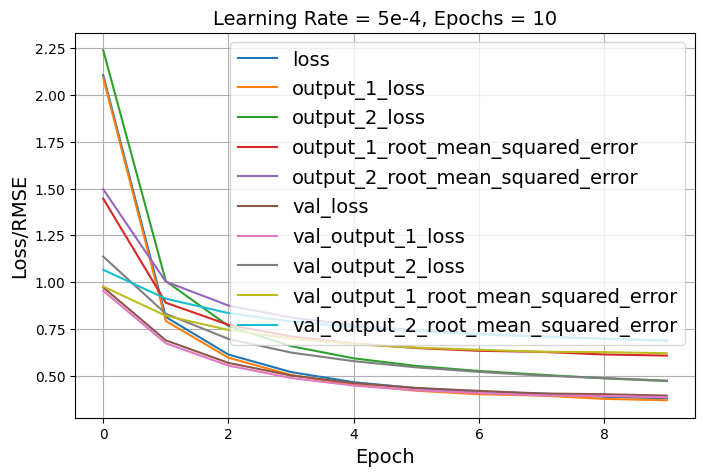

Model: "my_cool_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  multiple                 11        
 ion)                                                            
                                                                 
 normalization_3 (Normalizat  multiple                 13        
 ion)                                                            
                                                                 
 dense_4 (Dense)             multiple                  210       
                                                                 
 dense_5 (Dense)             multiple                  930       
                                                                 
 dense_6 (Dense)             multiple                  36        
                                                                 
 dense_7 (Dense)             multiple                

In [81]:
# Ex.10.3.4
tf.keras.backend.clear_session()
tf.random.set_seed(42)
model1 = WideAndDeepModel(30)
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-4)  # 이 부분을 각 케이스별로 변경

model1.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=optimizer,
              metrics=[[tf.keras.metrics.RootMeanSquaredError()], 
                      [tf.keras.metrics.RootMeanSquaredError()]])
model1.norm_layer_wide.adapt(X_train_wide)
model1.norm_layer_deep.adapt(X_train_deep)

start_time = time.time()
history = model1.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,  # 에포크 수도 변경
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
end_time = time.time()

print("\nEvaluating...")
eval_results = model1.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_rmse = eval_results[3]*0.9 + eval_results[4]*0.1
print("weighted_sum_of_rmses: ", weighted_sum_of_rmse)

# 학습 곡선 그리기
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title(f"Learning Rate = 5e-4, Epochs = 10")
plt.xlabel("Epoch")
plt.ylabel("Loss/RMSE")
plt.show()
model.summary()

Epoch 1/20
465/465 [==============================] - 2s 3ms/step - loss: 2.3448 - output_1_loss: 2.3000 - output_2_loss: 2.7477 - output_1_root_mean_squared_error: 1.5166 - output_2_root_mean_squared_error: 1.6576 - val_loss: 0.8490 - val_output_1_loss: 0.7820 - val_output_2_loss: 1.4514 - val_output_1_root_mean_squared_error: 0.8843 - val_output_2_root_mean_squared_error: 1.2048
Epoch 2/20
465/465 [==============================] - 1s 3ms/step - loss: 0.6907 - output_1_loss: 0.6229 - output_2_loss: 1.3003 - output_1_root_mean_squared_error: 0.7893 - output_2_root_mean_squared_error: 1.1403 - val_loss: 0.5632 - val_output_1_loss: 0.5194 - val_output_2_loss: 0.9573 - val_output_1_root_mean_squared_error: 0.7207 - val_output_2_root_mean_squared_error: 0.9784
Epoch 3/20
465/465 [==============================] - 1s 3ms/step - loss: 0.5173 - output_1_loss: 0.4714 - output_2_loss: 0.9306 - output_1_root_mean_squared_error: 0.6866 - output_2_root_mean_squared_error: 0.9647 - val_loss: 0.492

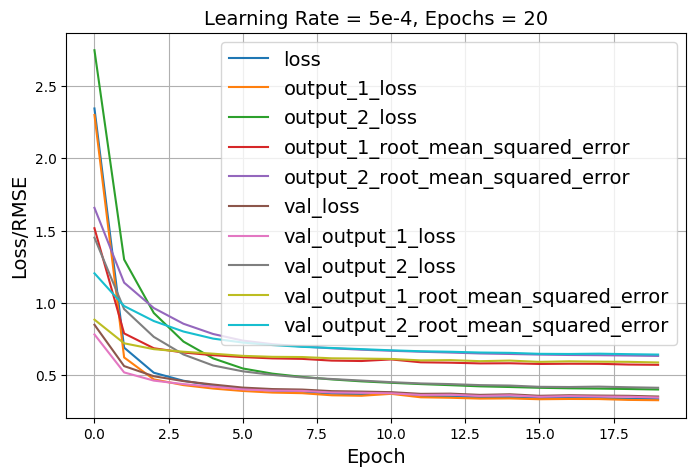

Model: "my_cool_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  multiple                 11        
 ion)                                                            
                                                                 
 normalization_3 (Normalizat  multiple                 13        
 ion)                                                            
                                                                 
 dense_4 (Dense)             multiple                  210       
                                                                 
 dense_5 (Dense)             multiple                  930       
                                                                 
 dense_6 (Dense)             multiple                  36        
                                                                 
 dense_7 (Dense)             multiple                

In [80]:
# Ex.10.3.5
tf.keras.backend.clear_session()
tf.random.set_seed(42)
model1 = WideAndDeepModel(30)
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-4)  # 이 부분을 각 케이스별로 변경

model1.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=optimizer,
              metrics=[[tf.keras.metrics.RootMeanSquaredError()], 
                      [tf.keras.metrics.RootMeanSquaredError()]])
model1.norm_layer_wide.adapt(X_train_wide)
model1.norm_layer_deep.adapt(X_train_deep)

start_time = time.time()
history = model1.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,  # 에포크 수도 변경
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
end_time = time.time()

print("\nEvaluating...")
eval_results = model1.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_rmse = eval_results[3]*0.9 + eval_results[4]*0.1
print("weighted_sum_of_rmses: ", weighted_sum_of_rmse)

# 학습 곡선 그리기
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title(f"Learning Rate = 5e-4, Epochs = 20")
plt.xlabel("Epoch")
plt.ylabel("Loss/RMSE")
plt.show()
model.summary()

# Exercise 10.3 하이퍼파라미터 실험 결과 분석

## 1. 학습률 영향 분석
- **높은 학습률(2e-3)**: 초기에 빠른 학습을 보이지만, 낮은 학습률에 비해 최종 손실값이 더 높게 수렴하는 경향이 있다.
- **중간 학습률(1e-3)**: 빠른 학습과 낮은 최종 손실 간의 좋은 균형을 제공한다.
- **낮은 학습률(5e-4)**: 초기 학습 속도는 느리지만, 최종적으로 더 낮은 손실값에 도달하는 경향이 있다.

## 2. 에포크 수 영향 분석
- **에포크 5**: 모델이 충분히 학습되기에 부족하다.
- **에포크 10**: 중간 정도의 학습 시간으로 대부분의 학습률에서 괜찮은 성능을 보인다.
- **에포크 20**: 낮은 학습률(5e-4)에서 모델이 완전히 수렴할 시간을 제공하여 최상의 성능을 달성한다.
- 학습률 2e-3의 경우, 에포크 5에서 10으로 증가했을 때 성능 향상이 뚜렷하다.

## 3. 학습 안정성 분석
- **낮은 학습률(5e-4)**: 더 안정적인 학습 곡선을 보여준다. 특히 에포크 20에서는 초기 급격한 감소 후 완만하게 수렴한다.
- **높은 학습률(2e-3)**: 학습 초기에 급격한 손실 감소를 보이지만, 이후 약간의 불안정성을 보일 수 있다.
- **중간 학습률(1e-3)**: 초기 빠른 학습과 안정적인 수렴 사이의 좋은 균형을 제공한다.

## 4. 검증 성능 분석
- 모든 설정에서 훈련 손실(loss)과 검증 손실(val_loss) 간의 간격이 크지 않아 과적합 문제는 심각하지 않다.
- 낮은 학습률과 더 많은 에포크(5e-4, 20 에포크)에서 검증 성능이 가장 좋다. (by val_lass & loss 간 차이를 통해)

## 5. 가중 RMSE 분석
- 학습률을 낮추고 에포크를 늘림에 따라 가중 RMSE 값이 개선되는 경향이 있다.
- 학습률 5e-4, 에포크 20의 설정이 가장 낮은 가중 RMSE 값을 제공한다.

## 결론
Wide and Deep 모델에서 California 주택 가격 예측을 위한 최적의 하이퍼파라미터는 학습률 5e-4, 에포크 20으로 보인다. 이 설정은 가장 낮은 손실과 RMSE를 달성하며, 안정적인 학습을 보장한다. 학습률이 낮을수록 초기 학습은 느리지만 최종 결과는 더 우수하며, 더 많은 에포크를 통해 모델이 충분히 수렴할 시간을 제공한다. 하지만 학습 시간과 성능 간의 트레이드오프를 고려할 때, 학습률 1e-3, 에포크 10도 효율적인 대안이 될 수 있다.